<a href="https://colab.research.google.com/github/dharani756/DS-lab/blob/main/rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load dataset
df = pd.read_csv("/content/sample_data/odisha_rainfall.csv")

# Quick check
print(df.head())
print(df.info())
print(df.describe())


   District  January  February  March  April    May   June   July  August  \
0     ANGUL     12.1      13.8   21.8   29.0   63.2  209.0  332.5   361.3   
1  BALASORE     15.4      23.9   34.6   63.8  136.9  252.7  309.6   354.8   
2   BARGARH      8.9      12.3   12.2   15.3   27.9  213.7  380.6   384.7   
3   BHADRAK     10.4      20.7   29.5   55.9  114.1  206.8  290.1   339.3   
4  BOLANGIR      9.2      10.1   11.1   18.6   36.3  177.0  357.0   354.5   

   September  ...  December  Annual_Rainfall  Winter_Rainfall  \
0      222.0  ...       6.6           1375.9             25.9   
1      308.0  ...       5.5           1728.5             39.3   
2      215.7  ...       8.1           1338.3             21.2   
3      254.2  ...       5.0           1536.5             31.1   
4      206.6  ...       5.6           1249.1             19.3   

   Pre_Monsoon_Rainfall  Monsoon_Rainfall  Post_Monsoon_Rainfall  \
0                 114.0            1124.8                  111.2   
1         

In [3]:
# Check missing values
print(df.isnull().sum())

# Check duplicates
print(df.duplicated().sum())

# Check types
print(df.dtypes)


District                 0
January                  0
February                 0
March                    0
April                    0
May                      0
June                     0
July                     0
August                   0
September                0
October                  0
November                 0
December                 0
Annual_Rainfall          0
Winter_Rainfall          0
Pre_Monsoon_Rainfall     0
Monsoon_Rainfall         0
Post_Monsoon_Rainfall    0
Winter_Percent           0
Pre_Monsoon_Percent      0
Monsoon_Percent          0
Post_Monsoon_Percent     0
dtype: int64
0
District                  object
January                  float64
February                 float64
March                    float64
April                    float64
May                      float64
June                     float64
July                     float64
August                   float64
September                float64
October                  float64
November                 flo

In [5]:
print(df.columns)


Index(['District', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Annual_Rainfall', 'Winter_Rainfall', 'Pre_Monsoon_Rainfall',
       'Monsoon_Rainfall', 'Post_Monsoon_Rainfall', 'Winter_Percent',
       'Pre_Monsoon_Percent', 'Monsoon_Percent', 'Post_Monsoon_Percent'],
      dtype='object')


In [10]:
import pandas as pd

# Assume df is already loaded
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

# Melt monthly columns into one 'Rainfall' column
df_long = df.melt(id_vars=['District'], value_vars=months,
                  var_name='Month', value_name='Rainfall')

# Fill missing values by interpolation
df_long['Rainfall'] = df_long['Rainfall'].interpolate()

# Optional: convert Month names to numbers
month_mapping = {name: i for i, name in enumerate(months, start=1)}
df_long['Month'] = df_long['Month'].map(month_mapping)

# Add Year or Date column if needed
df_long['Year'] = 2023  # replace with correct year column if exists
df_long['Date'] = pd.to_datetime(df_long[['Year','Month']].assign(DAY=1))

# Check cleaned data
print(df_long.head())


   District  Month  Rainfall  Year       Date
0     ANGUL      1      12.1  2023 2023-01-01
1  BALASORE      1      15.4  2023 2023-01-01
2   BARGARH      1       8.9  2023 2023-01-01
3   BHADRAK      1      10.4  2023 2023-01-01
4  BOLANGIR      1       9.2  2023 2023-01-01


In [11]:
# --- Step 4: Handle missing values ---
df_long['Rainfall'] = df_long['Rainfall'].interpolate()  # interpolate missing values
df_long = df_long.dropna()

In [12]:
# --- Step 5: Convert Month names to numbers ---
month_mapping = {name: i for i, name in enumerate(months, start=1)}
df_long['Month'] = df_long['Month'].map(month_mapping)

In [13]:
df_long['Year'] = 2023
df_long['Date'] = pd.to_datetime(df_long[['Year','Month']].assign(DAY=1))
df_long = df_long.sort_values('Date').reset_index(drop=True)

In [14]:
# --- Step 7: Detect and remove outliers using IQR method ---
Q1 = df_long['Rainfall'].quantile(0.25)
Q3 = df_long['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df_long[(df_long['Rainfall'] >= Q1 - 1.5*IQR) &
                   (df_long['Rainfall'] <= Q3 + 1.5*IQR)]

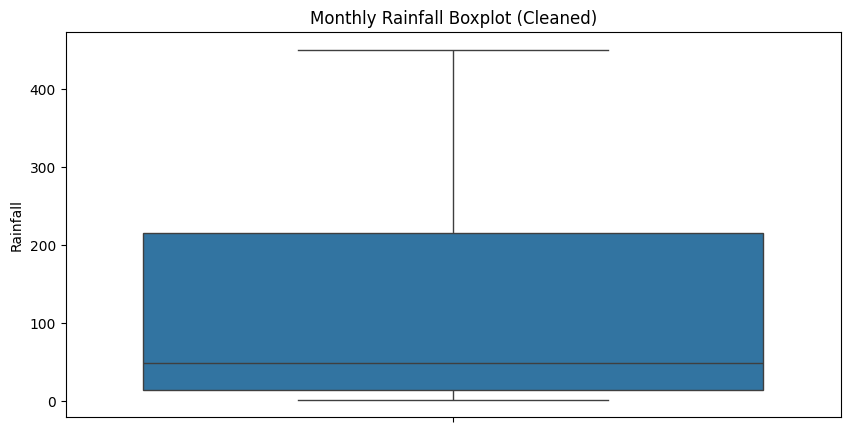

In [15]:
# Optional: visualize cleaned rainfall data
plt.figure(figsize=(10,5))
sns.boxplot(df_clean['Rainfall'])
plt.title("Monthly Rainfall Boxplot (Cleaned)")
plt.show()

In [16]:
print(df_clean.head())
print("Cleaned dataset shape:", df_clean.shape)

   District  Month  Rainfall  Year Date
0     ANGUL    NaN      12.1  2023  NaT
1  BALASORE    NaN      15.4  2023  NaT
2   BARGARH    NaN       8.9  2023  NaT
3   BHADRAK    NaN      10.4  2023  NaT
4  BOLANGIR    NaN       9.2  2023  NaT
Cleaned dataset shape: (360, 5)


In [17]:
df_clean.to_csv("odisha_rainfall_cleaned.csv", index=False)
print("Cleaned dataset saved as 'odisha_rainfall_cleaned.csv'")

Cleaned dataset saved as 'odisha_rainfall_cleaned.csv'


In [21]:

# === Step 7: Train-Test Split ===
X = df_clean[['Year', 'Month']]
y = df_clean['Rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [23]:
from sklearn.ensemble import RandomForestRegressor

# === Train Random Forest Regressor ===
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)  # Make sure X_train and y_train are defined

# === Predict on test set ===
y_pred = model.predict(X_test)


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# RMSE calculation for older scikit-learn versions
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")



RMSE: 119.50
MAE: 114.38
R² Score: -7.95


In [28]:
df = pd.read_csv("/content/sample_data/odisha_rainfall.csv")


In [31]:
print("Columns in the dataset:", df.columns)


Columns in the dataset: Index(['District', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October', 'November', 'December',
       'Annual_Rainfall', 'Winter_Rainfall', 'Pre_Monsoon_Rainfall',
       'Monsoon_Rainfall', 'Post_Monsoon_Rainfall', 'Winter_Percent',
       'Pre_Monsoon_Percent', 'Monsoon_Percent', 'Post_Monsoon_Percent'],
      dtype='object')


In [32]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']

df_long = df.melt(id_vars=['District'], value_vars=months,
                  var_name='Month', value_name='Rainfall')

In [33]:
month_mapping = {name: i for i, name in enumerate(months, start=1)}
df_long['Month'] = df_long['Month'].map(month_mapping)

In [34]:
df_long['Year'] = 2023
df_long['Date'] = pd.to_datetime(df_long[['Year','Month']].assign(DAY=1))

In [35]:
print("Missing values per column:\n", df_long.isnull().sum())
print("Number of duplicate rows:", df_long.duplicated().sum())

Missing values per column:
 District    0
Month       0
Rainfall    0
Year        0
Date        0
dtype: int64
Number of duplicate rows: 0


In [36]:
print(df_long[['Date', 'District', 'Rainfall']].head(12))

         Date       District  Rainfall
0  2023-01-01          ANGUL      12.1
1  2023-01-01       BALASORE      15.4
2  2023-01-01        BARGARH       8.9
3  2023-01-01        BHADRAK      10.4
4  2023-01-01       BOLANGIR       9.2
5  2023-01-01      BOUDHGARH       6.6
6  2023-01-01        CUTTACK      10.3
7  2023-01-01        DEOGARH      14.3
8  2023-01-01      DHENKANAL      11.7
9  2023-01-01       GAJAPATI       9.4
10 2023-01-01         GANJAM      10.3
11 2023-01-01  JAGATSINGHPUR       8.7
